Comparing our Fluxbot data to CIRAS data collected at the "same" time

1. Load the CIRAS data
1. Load the Fluxbots
1. Find the closest event for each CIRAS data.

In [19]:
import pandas as pd
import numpy as np
import glob
import random
import matplotlib.pyplot as plot
from datetime import datetime

## Step 1: Load up the CIRAS data and create a timestamp column

In [2]:
# Get all the CIRAS data
# NOTE: This does not include the `dblchk` files..
ciras_dir = 'data/calval'
file = ciras_dir + '/calval_CIRASdat_Jan21.csv'

In [3]:
ciras_df = pd.read_csv(file)

In [4]:
ciras_df.columns

Index(['PLOT', 'TRTMNT', 'FEAT', 'BOTREP', 'BOTID', 'CIRASFLX_L', 'CIRASFLX_Q',
       'CIRAS_T'],
      dtype='object')

In [5]:
# ciras_df['timestamp'] = pd.to_datetime(df.CIRAS_T)
# ciras_df['timestamp'] = pd.to_datetime(ciras_df.CIRAS_T)

ciras_df['timestamp'] = datetime.datetime

ciras_df.head()

,PLOT,TRTMNT,FEAT,BOTREP,BOTID,CIRASFLX_L,CIRASFLX_Q,CIRAS_T,timestamp
0,N,O,OM,2,NO OM 2,2.55,2.47,8/17/19 10:34,2019-08-17 10:34:00
1,N,MWC,OM,1,NMWC OM 1,3.47,3.07,8/15/19 12:05,2019-08-15 12:05:00
2,N,MWC,OM,1,NMWC OM 1,4.03,3.62,8/13/19 12:01,2019-08-13 12:01:00
3,N,O,OM,2,NO OM 2,2.60,2.50,8/20/19 10:36,2019-08-20 10:36:00
4,N,O,UT,1,NO UT 1,1.81,1.36,8/13/19 12:53,2019-08-13 12:53:00


## Helper Functions to Read Data and Determine the "Closest" fluxbot observation

In [6]:
def float_conv(x):
    try:
        return float(x)
    except:
        return np.nan

locations = {
    'OM': 'Termite Soil',
    'UT': 'Under Tree',
    'OS': 'Open Soil'
}

# def find_closest(ciras, fluxbots):
#     this_treatment = ciras.TRTMNT
#     this_location = locations[ciras.FEAT]
#     this_replicate = ciras.BOTREP
#     df = fluxbots[
#         (fluxbots['treatment'] == this_treatment) & 
#         (fluxbots['location'] == this_feature) & 
#         (fluxbots['replicate'] == this_replicate)
#     ]
#     time_diffs = abs(df['timestamp'] - ciras.timestamp)
#     result = np.where(time_diffs == np.amin(time_diffs))
#     return df.iloc[result], np.amin(time_diffs)

def find_closest(ciras_df, event_df):
    this_treatment = ciras_df.TRTMNT
    this_location = locations[ciras_df.FEAT]
    this_replicate = ciras_df.BOTREP
    df = event_df[
        (event_df['treatment'] == this_treatment) & 
        (event_df['location'] == this_location) & 
        (event_df['replicate'] == this_replicate)
    ]
    time_diffs = abs(df['timestamp'] - ciras_df.timestamp)
    result = np.where(time_diffs == np.amin(time_diffs))
    return df.iloc[result], np.amin(time_diffs)


# Step 2: Load up all the fluxbot data.

In [36]:
event_file = 'data/avgP/all_events_with_bad_20.csv'
event_df = pd.read_csv(event_file, low_memory=False, converters={ 
    'ambient_CO2_kg':float_conv, 
    'ambient_CO2_ppm':float_conv, 
    'flux_umol_m2_sec':float_conv,
    'flux_max_umol_m2_sec':float_conv,
    'flux_min_umol_m2_sec':float_conv
})

# # convert the timestamp column to datetime:

In [37]:
event_df.head()

,timestamp,year,month,day,hour,event_number,avg_temp_degC,avg_pressure_hPa,avg_rel_humidity,ambient_humidity,...,flux_max_umol_m2_sec,flux_min_umol_m2_sec,qaqc_flags,datafile,chamber_volume_cm3,chamber_area_cm2,treatment,block,location,replicate
0,2019-08-05T18:55:06+00:00,2019,8,5,19,0,20.8,828.3,61.3,25.3,...,4.228,3.981,0,data/avgP/NMWC_OS2.csv,2758,145.5,MWC,Northern,Open Soil,2
1,2019-08-05T19:55:21+00:00,2019,8,5,20,1,18.9,831.0,63.0,55.4,...,-0.063,-0.264,0,data/avgP/NMWC_OS2.csv,2758,145.5,MWC,Northern,Open Soil,2
2,2019-08-05T20:55:21+00:00,2019,8,5,21,2,16.6,835.0,70.2,62.8,...,1.745,1.658,0,data/avgP/NMWC_OS2.csv,2758,145.5,MWC,Northern,Open Soil,2
3,2019-08-05T21:55:21+00:00,2019,8,5,22,3,16.6,835.5,71.7,68.3,...,0.399,0.325,0,data/avgP/NMWC_OS2.csv,2758,145.5,MWC,Northern,Open Soil,2
4,2019-08-05T22:55:21+00:00,2019,8,5,23,4,16.6,835.0,71.8,68.7,...,0.799,0.720,0,data/avgP/NMWC_OS2.csv,2758,145.5,MWC,Northern,Open Soil,2


In [60]:
# event_df['timestamp'] = pd.to_datetime(event_df['timestamp'])
event_df['timestamp'] = event_df['timestamp'].astype('datetime64[ns]')

# check and see if timezone is naive or aware:
# event_df['timestamp'].tzinfo

/var/folders/xm/7f1xz6bs0k15zd52nt5s9vfc0000gn/T/ipykernel_51912/1267532567.py:2: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  event_df['timestamp'] = event_df['timestamp'].astype('datetime64[ns]')


In [66]:
# check dtypes of the cols in event_df
# event_df.dtypes

In [52]:
# ciras_df.dtypes


## Merge the CIRAS data with the closest fluxbot observation.

In [62]:
# We will make a list of individual rows; each row is a dataframe that combines the CIRAS and the Fluxbot data.
joined_rows = []

# Iterate over each of the rows.
for i, row in ciras_df.iterrows():
    closest, dT = find_closest(row, event_df)
    closest = closest.reset_index()
    this_row = pd.DataFrame(row).T
    this_row = this_row.reset_index()
    this_obs = this_row.join(closest, how='outer', rsuffix='_fluxbot', lsuffix='_ciras')
    this_obs['delta_T'] = dT
    joined_rows.append(this_obs)

# calval_df = pd.concat([rows for rows in joined_rows])
calval_df_2 = pd.concat([rows for rows in joined_rows])

In [63]:
# calval_df.to_csv('data/ciras_fluxbot_calval.csv')
calval_df_2.to_csv('data/ciras_fluxbot_calval_2.csv')

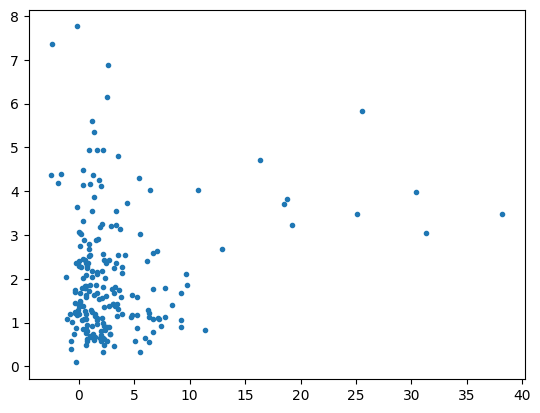

In [64]:
# plot.plot(calval_df['flux_umol_m2_sec'], calval_df['CIRASFLX_L'],'.')
plot.plot(calval_df_2['flux_umol_m2_sec'], calval_df_2['CIRASFLX_L'],'.')
plot.show()

In [65]:
calval_df_2


,index_ciras,PLOT,TRTMNT,FEAT,BOTREP,BOTID,CIRASFLX_L,CIRASFLX_Q,CIRAS_T,timestamp_ciras,...,flux_min_umol_m2_sec,qaqc_flags,datafile,chamber_volume_cm3,chamber_area_cm2,treatment,block,location,replicate,delta_T
0,0,N,O,OM,2,NO OM 2,2.55,2.47,8/17/19 10:34,2019-08-17 10:34:00,...,4.091,0,data/avgP/NO_OM2.csv,2758,145.5,O,Northern,Termite Soil,2,0 days 00:21:21
0,1,N,MWC,OM,1,NMWC OM 1,3.47,3.07,8/15/19 12:05,2019-08-15 12:05:00,...,24.664,0,data/avgP/NMWC_OM1.csv,2758,145.5,MWC,Northern,Termite Soil,1,0 days 00:09:39
0,2,N,MWC,OM,1,NMWC OM 1,4.03,3.62,8/13/19 12:01,2019-08-13 12:01:00,...,6.335,0,data/avgP/NMWC_OM1.csv,2758,145.5,MWC,Northern,Termite Soil,1,0 days 00:04:42
0,3,N,O,OM,2,NO OM 2,2.6,2.5,8/20/19 10:36,2019-08-20 10:36:00,...,6.622,0,data/avgP/NO_OM2.csv,2758,145.5,O,Northern,Termite Soil,2,0 days 00:19:21
0,4,N,O,UT,1,NO UT 1,1.81,1.36,8/13/19 12:53,2019-08-13 12:53:00,...,3.132,0,data/avgP/NO_UT1.csv,2758,145.5,O,Northern,Under Tree,1,0 days 00:02:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,207,N,O,OS,2,NO OS 2,2.36,2.35,8/22/19 11:16,2019-08-22 11:16:00,...,0.579,0,data/avgP/NO_OS2.csv,2758,145.5,O,Northern,Open Soil,2,0 days 01:39:21
0,208,N,MWC,OM,1,NMWC OM 1,5.84,5.69,8/14/19 9:34,2019-08-14 09:34:00,...,25.338,0,data/avgP/NMWC_OM1.csv,2758,145.5,MWC,Northern,Termite Soil,1,0 days 00:22:18
0,209,N,MWC,UT,3,NMWC UT 3,1.19,0.73,8/13/19 11:37,2019-08-13 11:37:00,...,-0.100,0,data/avgP/NMWC_UT3.csv,2758,145.5,MWC,Northern,Under Tree,3,0 days 00:18:21
0,210,N,MWC,OM,1,NMWC OM 1,3.99,3.76,8/17/19 9:32,2019-08-17 09:32:00,...,29.891,0,data/avgP/NMWC_OM1.csv,2758,145.5,MWC,Northern,Termite Soil,1,0 days 00:36:39
